In [26]:

import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# para gráficos acf e pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from utilsforecast.plotting import plot_series

# para gerar dados arima
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess


In [19]:
dados = pd.read_csv(
  "https://github.com/padsInsper/202307-fa/raw/main/serie_temporal.csv"
)

dados['unique_id'] = 1
dados['ds'] = pd.to_datetime(dados['ds'])

dados.head()


,ds,y,unique_id
0,2000-01-01,50.9,1
1,2000-01-02,51.4,1
2,2000-01-03,52.0,1
3,2000-01-04,52.7,1
4,2000-01-05,53.5,1


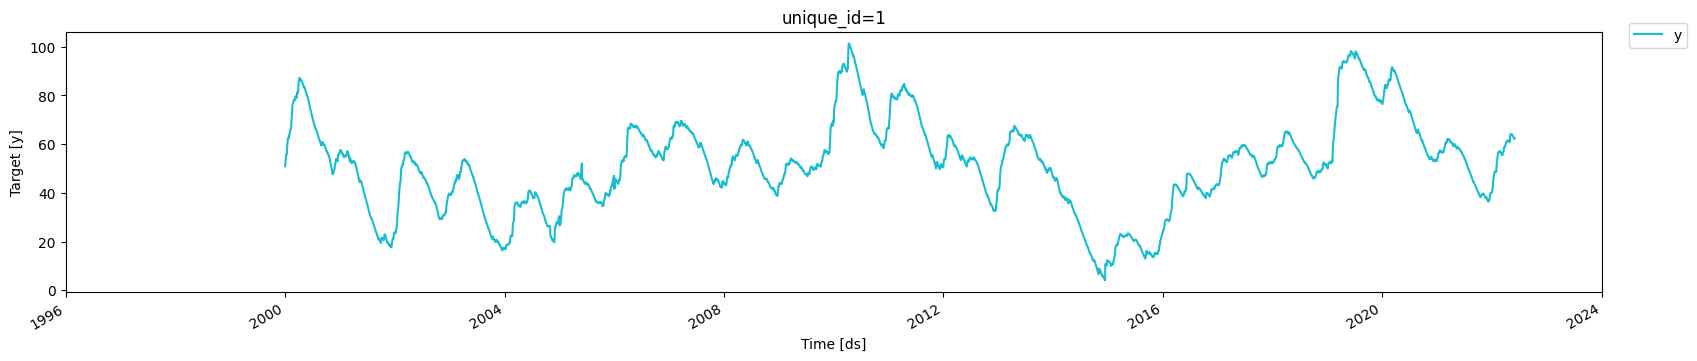

In [20]:
plot_series(dados)

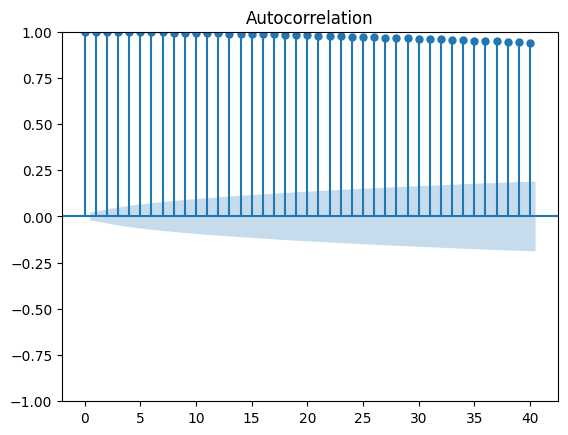

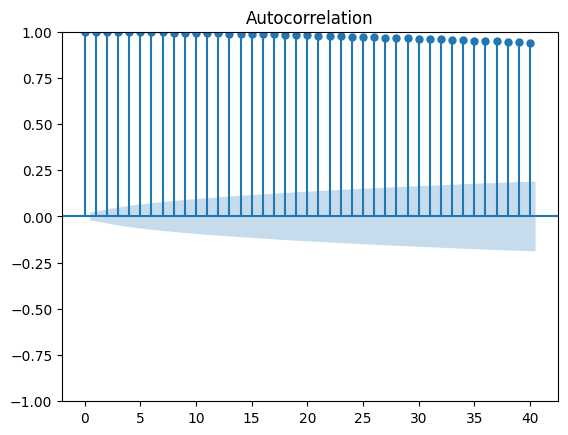

In [22]:
plot_acf(dados['y'])

In [27]:
kpss(dados['y'])

C:\Users\julio\AppData\Local\Temp\ipykernel_24216\1633020732.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(dados['y'])


(np.float64(0.9276883135900827),
 np.float64(0.01),
 55,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [28]:
adfuller(dados['y'])

(np.float64(-3.9674966732367998),
 np.float64(0.001590604948083861),
 34,
 8152,
 {'1%': np.float64(-3.4311524239845292),
  '5%': np.float64(-2.8618946148165185),
  '10%': np.float64(-2.5669587566950463)},
 np.float64(711.6392372916634))

<Axes: >

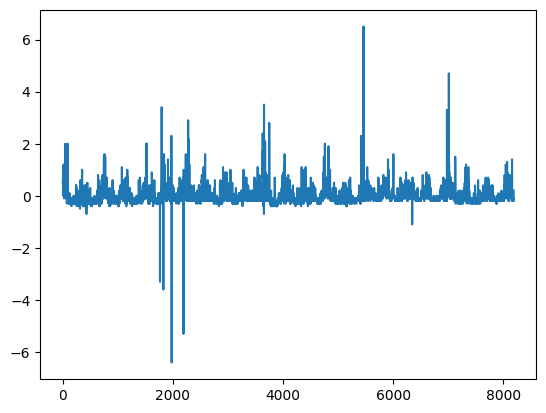

In [30]:
# fazendo a diferença

dados['y_diff'] = dados['y'].diff()

dados['y_diff'].plot()

In [4]:

#dados.plot()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mes     48 non-null     int64  
 1   vendas  48 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 900.0 bytes


<Axes: xlabel='mes', ylabel='vendas'>

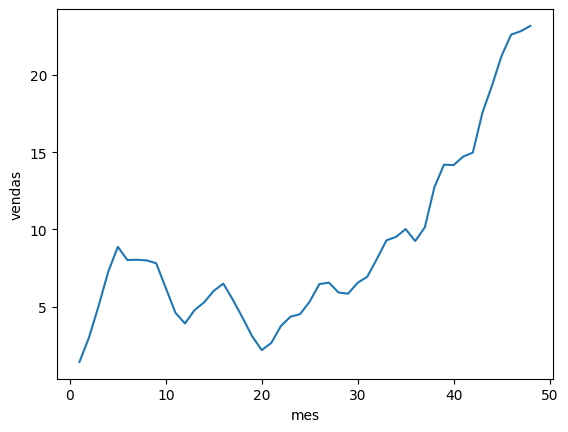

In [5]:
sns.lineplot(data = dados, x='mes', y='vendas')



C:\Users\julio\AppData\Local\Temp\ipykernel_24216\2987365574.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2005-06-01", periods = 48, freq = "M")


(array([12965., 13149., 13330., 13514., 13695., 13879., 14061., 14245.,
        14426.]),
 [Text(12965.0, 0, '2005-07'),
  Text(13149.0, 0, '2006-01'),
  Text(13330.0, 0, '2006-07'),
  Text(13514.0, 0, '2007-01'),
  Text(13695.0, 0, '2007-07'),
  Text(13879.0, 0, '2008-01'),
  Text(14061.0, 0, '2008-07'),
  Text(14245.0, 0, '2009-01'),
  Text(14426.0, 0, '2009-07')])

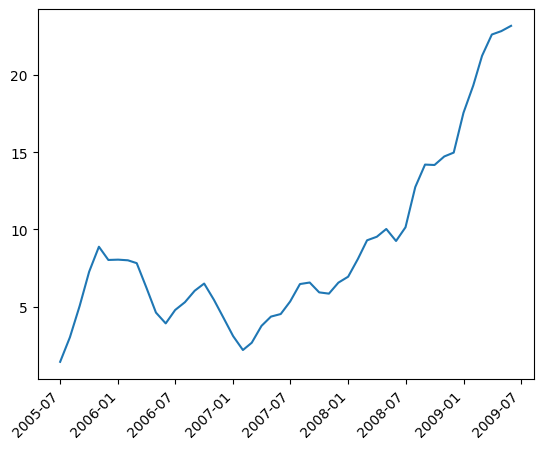

In [6]:
dates = pd.date_range("2005-06-01", periods = 48, freq = "M")
serie_dados = pd.Series(dados['vendas'].array, index = dates)
sns.lineplot(data = serie_dados)
# set x axis label 45 degrees
plt.xticks(rotation=45, ha='right')

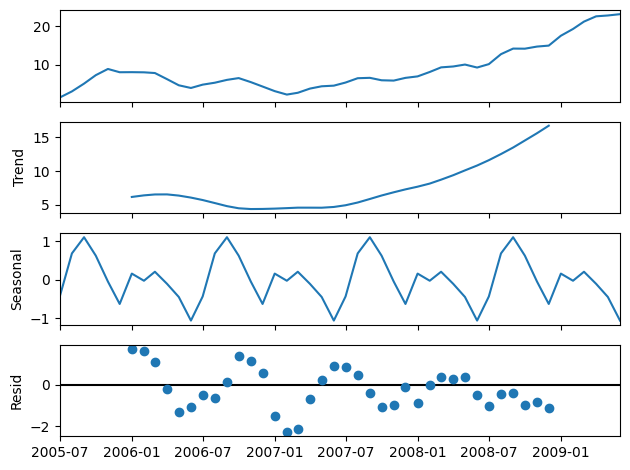

In [7]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(serie_dados)
resplot = res.plot()


In [8]:
from statsmodels.tsa.seasonal import STL

stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()

,ds,y
0,2000-01-01,50.9
1,2000-01-02,51.4
2,2000-01-03,52.0
3,2000-01-04,52.7
4,2000-01-05,53.5
